In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
df=pd.read_csv("../data/final_cleaned_crop_data.csv")

In [4]:
# I'll create a directory to save the images if it doesn't exist.
output_dir = "../images"
os.makedirs(output_dir, exist_ok=True)

In [5]:
df.columns

Index(['State', 'District', 'Year', 'Season', 'Crop', 'Area_Hectare',
       'Yield_Tonnes/Hectare', 'Rainfall_mm', 'Fertilizer_kg', 'Pesticide_kg',
       'pH'],
      dtype='object')

Correlation Heatmap...


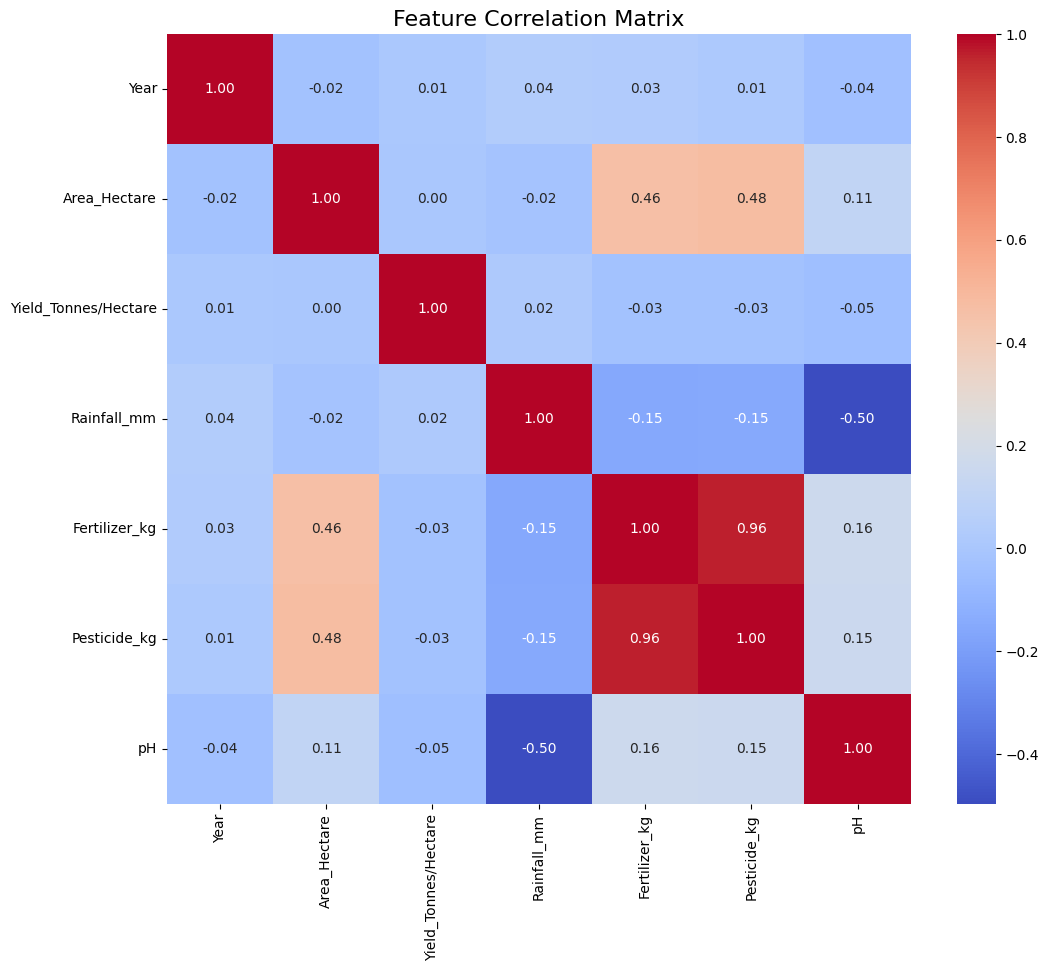

In [6]:
# --- Visualization 1: Correlation Heatmap ---
# This shows which numerical features are most strongly related to yield.
print("Correlation Heatmap...")
plt.figure(figsize=(12, 10))
# I'm selecting only the numeric columns for the correlation matrix.
numeric_cols = ['Year', 'Area_Hectare', 'Yield_Tonnes/Hectare',
                'Rainfall_mm', 'Fertilizer_kg', 'Pesticide_kg', 'pH']
correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix', fontsize=16)
# I'll save the figure before showing it.
plt.savefig(os.path.join(output_dir, 'correlation_heatmap.png'))
plt.show()


Top Crops by Yield Plot...


C:\Users\Punith\AppData\Local\Temp\ipykernel_22820\456036229.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crops.index, y=top_crops.values, palette='viridis')


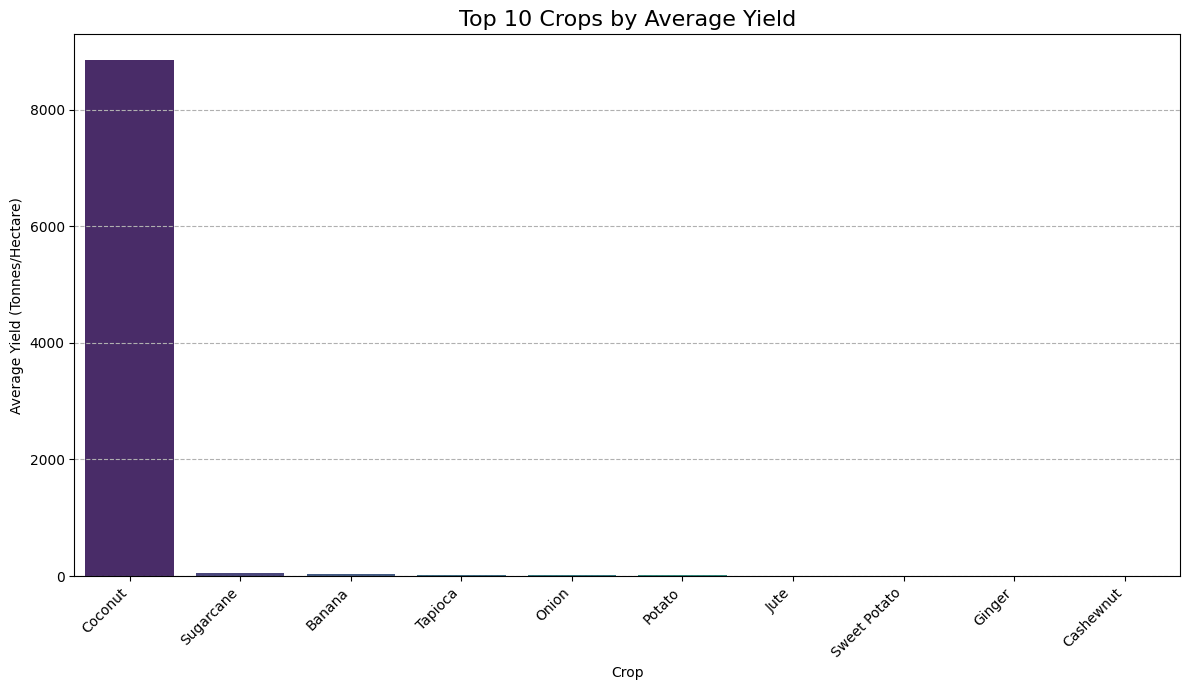

In [7]:
# --- Visualization 2: Top 10 Crops by Average Yield ---
# This helps us understand which crops are the most productive on average.
print("\nTop Crops by Yield Plot...")
top_crops = df.groupby(
    'Crop')['Yield_Tonnes/Hectare'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_crops.index, y=top_crops.values, palette='viridis')
plt.title('Top 10 Crops by Average Yield', fontsize=16)
plt.xlabel('Crop')
plt.ylabel('Average Yield (Tonnes/Hectare)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'top_crops_yield.png'))
plt.show()


Top States by Yield Plot...


C:\Users\Punith\AppData\Local\Temp\ipykernel_22820\3782856305.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='plasma')


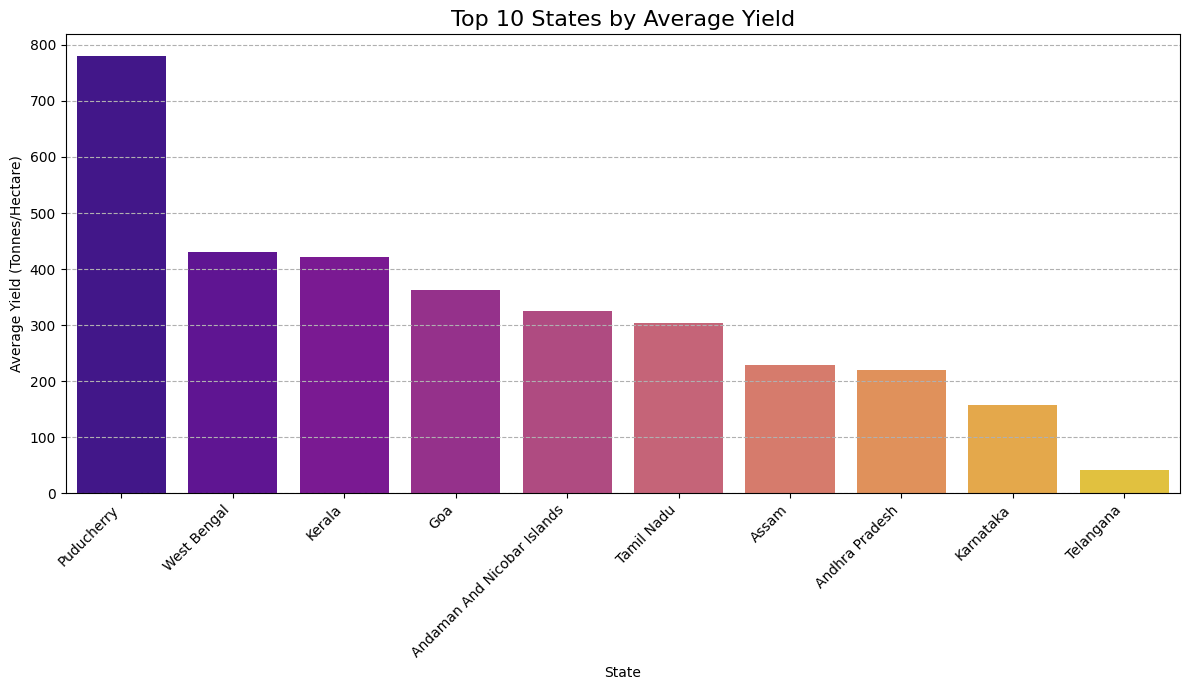

In [8]:
# --- Visualization 3: Top 10 States by Average Yield ---
# This shows which states are the most productive on average.
print("\nTop States by Yield Plot...")
top_states = df.groupby(
    'State')['Yield_Tonnes/Hectare'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_states.index, y=top_states.values, palette='plasma')
plt.title('Top 10 States by Average Yield', fontsize=16)
plt.xlabel('State')
plt.ylabel('Average Yield (Tonnes/Hectare)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'top_states_yield.png'))
plt.show()

### Removing the Coconut Outlier
- During my exploratory data analysis, I created a plot to visualize the average yield for the top 10 crops. This plot immediately revealed a massive outlier.

- As the graph shows, the average yield for Coconut is over 9,000 Tonnes/Hectare, while the next highest crop, Sugarcane, is less than 100. A yield of 9,000 tonnes is physically impossible and indicates a clear data quality issue. The most likely reason is that the yield for coconuts was recorded in a different unit, probably nuts per hectare, not tonnes per hectare.

- Keeping this data would severely damage the model. The extreme value for coconuts would skew the entire training process, leading to poor predictions for all other crops. Therefore, to ensure the integrity and accuracy of the model, I am removing all records for the 'Coconut' crop from the dataset.

In [11]:
print(f"Shape of the DataFrame before removing coconut: {df.shape}")

# I'm creating a new DataFrame that excludes all rows where the crop is 'Coconut'.
df_final_cleaned = df[df['Crop'] != 'Coconut'].copy()

print(
    f"Shape of the DataFrame after removing coconut:  {df_final_cleaned.shape}")

Shape of the DataFrame before removing coconut: (345273, 11)
Shape of the DataFrame after removing coconut:  (342355, 11)


In [12]:
df_final_cleaned.to_csv("../data/After_EDA_crop_data.csv", index=False)